In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [3]:
df = pd.read_csv('/content/placement.csv')

In [4]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [5]:
df.shape

(200, 2)

Text(0.5, 1.0, 'Cgpa vs Package')

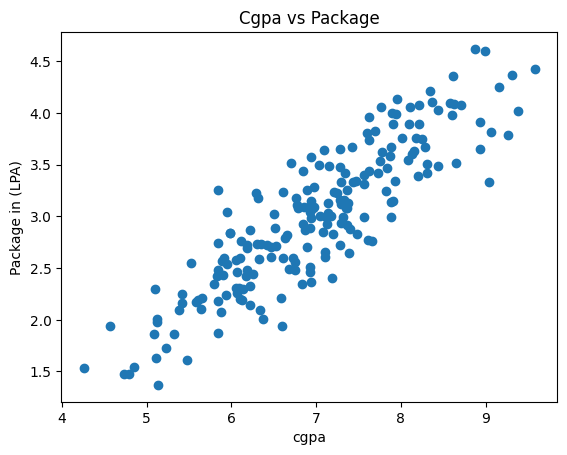

In [6]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('cgpa')
plt.ylabel('Package in (LPA)')
plt.title('Cgpa vs Package')


In [7]:
x = df.iloc[:,0]
y = df.iloc[:,1]

In [8]:
x = df['cgpa'].values.reshape(-1,1)

In [9]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.2, random_state =2)

In [12]:
lr = LinearRegression()

In [13]:
lr.fit(x_train,y_train)

LinearRegression()

In [14]:
y_predict= lr.predict(x_test)
y_predict[0]

3.891116009744203

Text(0.5, 1.0, 'Linear regression ')

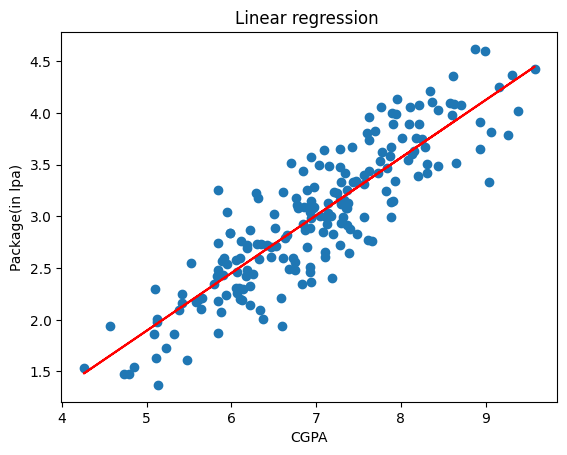

In [15]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(x_train,lr.predict(x_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')
plt.title('Linear regression ')

In [16]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [17]:
print("MAE",mean_absolute_error(y_test,y_predict))

MAE 0.2884710931878175


In [18]:
print("MSE",mean_squared_error(y_test,y_predict))

MSE 0.12129235313495527


In [19]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_predict)))

RMSE 0.34827051717731616


In [20]:
r2 = r2_score(y_test,y_predict)
r2

0.780730147510384

In [21]:
#adjusted r2 square
x_test.shape

(40, 1)

In [22]:
1-((1-r2)*(40-1)/(40-1-1))

0.7749598882343415

In [26]:
new_df1 = df.copy()
new_df1['random feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random feature','package']]
new_df1.head()

,cgpa,random feature,package
0,6.89,0.271520,3.26
1,5.12,0.828788,1.98
2,7.82,0.924651,3.25
3,7.42,0.773065,3.67
4,6.94,0.557654,3.57


Text(0, 0.5, 'Package(in lpa)')

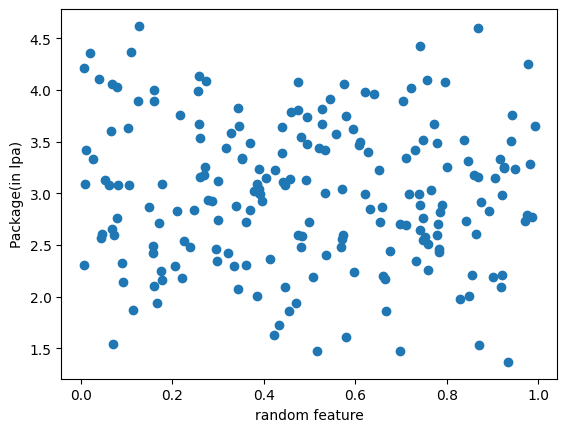

In [28]:
plt.scatter(new_df1['random feature'],new_df1['package'])
plt.xlabel('random feature')
plt.ylabel('Package(in lpa)')

In [29]:
x = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [31]:
lr = LinearRegression()

In [33]:
lr.fit(x_train,y_train)

LinearRegression()

In [34]:
y_predict = lr.predict(x_test)

In [35]:
print("R2 score",r2_score(y_test,y_predict))
r2 = r2_score(y_test,y_predict)

R2 score 0.7806289523712429


In [36]:
1 - ((1-r2)*(40-1)/(40-1-2))  #decreased

0.7687710579048235

In [37]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]

In [38]:
new_df2.sample(5)

,cgpa,iq,package
88,4.73,0.38,1.48
52,8.37,4.81,4.11
107,6.33,2.59,2.59
22,6.14,2.30,2.30
59,7.56,2.21,3.31


Text(0, 0.5, 'Package(in lpa)')

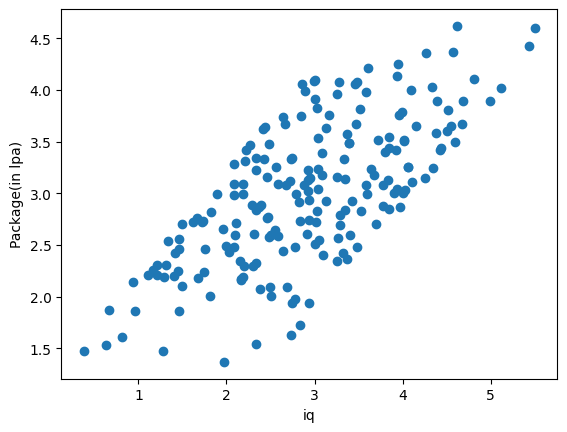

In [39]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [40]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]

In [41]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [42]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_predict = lr.predict(x_test)

In [43]:
print("R2 score",r2_score(y_test,y_predict))
r2 = r2_score(y_test,y_predict)  #increased when relevent column is added

R2 score 0.7806289523712429


In [44]:
#value of adjusted r2
1 - ((1-r2)*(40-1)/(40-1-2))

0.7687710579048235